In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 
#import plotly.graph_objects as go

In [3]:
cas_confirme = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [4]:
cas_confirme.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140


In [5]:
cas_decede = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [6]:
cas_gueris = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
final_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-25-2020.csv')
final_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-26 02:30:51,34.223334,-82.461707,24,0,0,24,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-26 02:30:51,30.295065,-92.414197,130,7,0,123,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-26 02:30:51,37.767072,-75.632346,146,3,0,143,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-26 02:30:51,43.452658,-116.241552,650,15,0,635,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-26 02:30:51,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [8]:
cas_confirme.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20',
       '6/12/20', '6/13/20', '6/14/20'],
      dtype='object', length=149)

In [9]:
#Extraction de la colonne dates
confirmed = cas_confirme.iloc[:, 4:]
deaths = cas_decede.iloc[:, 4:]
recovered = cas_gueris.iloc[:,4:]

In [10]:
#creation d'une variable dates contenant les dates
dates = confirmed.keys()

In [11]:
#Calcul de la somme du nombre de cas , morts ,gueris
cas_mondial = []
total_mort = []
total_gueris = []

morocco_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 

morocco_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 

morocco_recovered = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 

for i in dates:
    sum_cas_mondial = confirmed[i].sum()#la somme totale des cas
    sum_deaths = deaths[i].sum()
    sum_recovered = recovered[i].sum()
    
    cas_mondial.append(sum_cas_mondial)#la somme des cas pour chaque pays
    total_mort.append(sum_deaths)#la somme des morts pour chaque pays
    total_gueris.append(sum_recovered)#la somme des gueris pour chaque pays
    
    #Pour Maroc
    #nombre_de_cas
    morocco_cases.append(cas_confirme[cas_confirme['Country/Region'] == 'Morocco'][i].sum())
    us_cases.append(cas_confirme[cas_confirme['Country/Region']=='US'][i].sum())
    spain_cases.append(cas_confirme[cas_confirme['Country/Region']=='Spain'][i].sum())
    france_cases.append(cas_confirme[cas_confirme['Country/Region']=='France'][i].sum())
    #nombre_de_Mort
    morocco_deaths.append(cas_decede[cas_decede['Country/Region'] == 'Morocco'][i].sum())
    us_deaths.append(cas_decede[cas_decede['Country/Region']=='US'][i].sum())
    spain_deaths.append(cas_decede[cas_decede['Country/Region']=='Spain'][i].sum())
    france_deaths.append(cas_decede[cas_decede['Country/Region']=='France'][i].sum())
    #nombre_de_Gueris
    morocco_recovered.append(cas_gueris[cas_gueris['Country/Region'] == 'Morocco'][i].sum())
    us_recoveries.append(cas_gueris[cas_gueris['Country/Region']=='US'][i].sum())
    spain_recoveries.append(cas_gueris[cas_gueris['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(cas_gueris[cas_gueris['Country/Region']=='France'][i].sum())

In [12]:
#Exploitation du dataset final_data
unique_pays = list(final_data['Country_Region'].unique())
unique_pays

['US',
 'Canada',
 'United Kingdom',
 'China',
 'Netherlands',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bis

In [13]:
#convertion de toutes les dates en format de tableau numpy (c'est _à_dire : de 0,1.....)
date_depuis_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)#date
morocco_cases = np.array(morocco_cases).reshape(-1,1)
morocco_deaths = np.array(morocco_deaths).reshape(-1,1)
morocco_recovered = np.array(morocco_recovered).reshape(-1,1)

In [24]:
#Ajout du nombre de jour à prevoir
jour_dans_future = 20
future_prediction = np.array([i for i in range(len(dates)+jour_dans_future)]).reshape(-1,1)
ajuster_date = future_prediction[:-20]

In [25]:
#    
debut = '1/22/2020'
#convertion de string en date
debut_date = datetime.datetime.strptime(debut,'%m/%d/%Y')
future_prediction_date = []#creation d'une liste pour la prediction des dates ajoutées

for i in range(len(future_prediction)):
    future_prediction_date.append((debut_date +datetime.timedelta(days =i)).strftime('%m/%d/%Y'))
    

In [16]:
#Visualization

In [28]:
def plot_graph(x, y, x_title, y_title, title):
    ajuster = ajuster_date.reshape(1,-1)[0]
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.xlabel(x_title, size=30)
    plt.ylabel(y_title, size=30)
    plt.title(title,size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

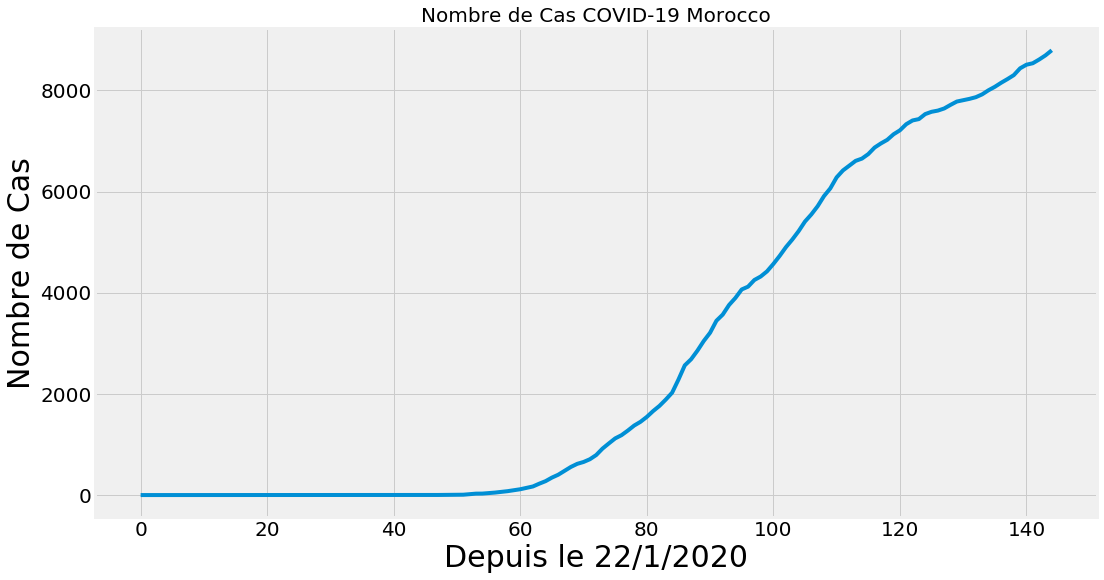

In [29]:
plot_graph(ajuster_date, morocco_cases, 'Depuis le 22/1/2020','Nombre de Cas','Nombre de Cas COVID-19 Morocco')

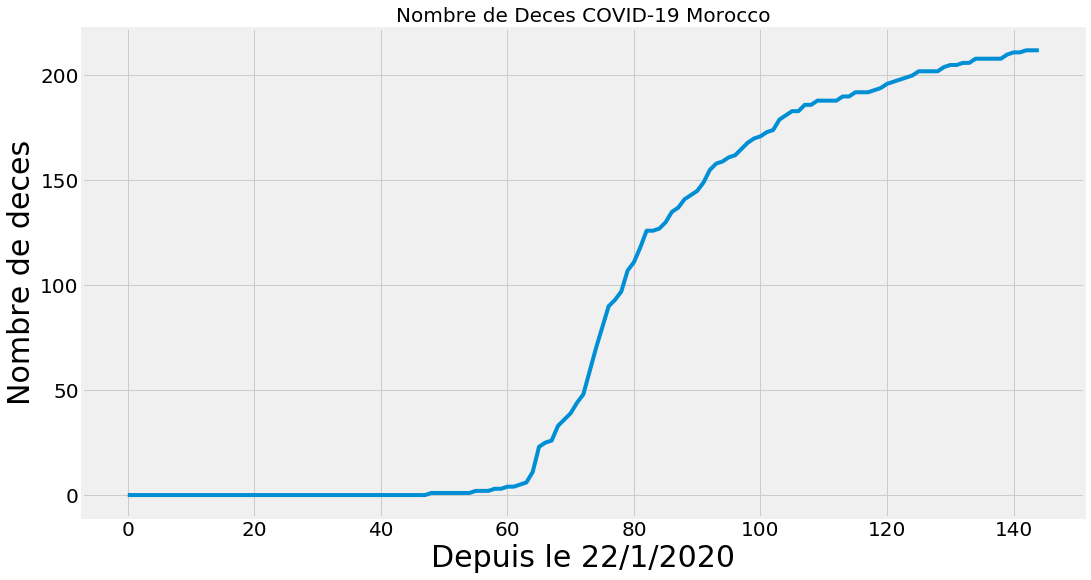

In [30]:
plot_graph(ajuster_date, morocco_deaths, 'Depuis le 22/1/2020','Nombre de deces','Nombre de Deces COVID-19 Morocco')

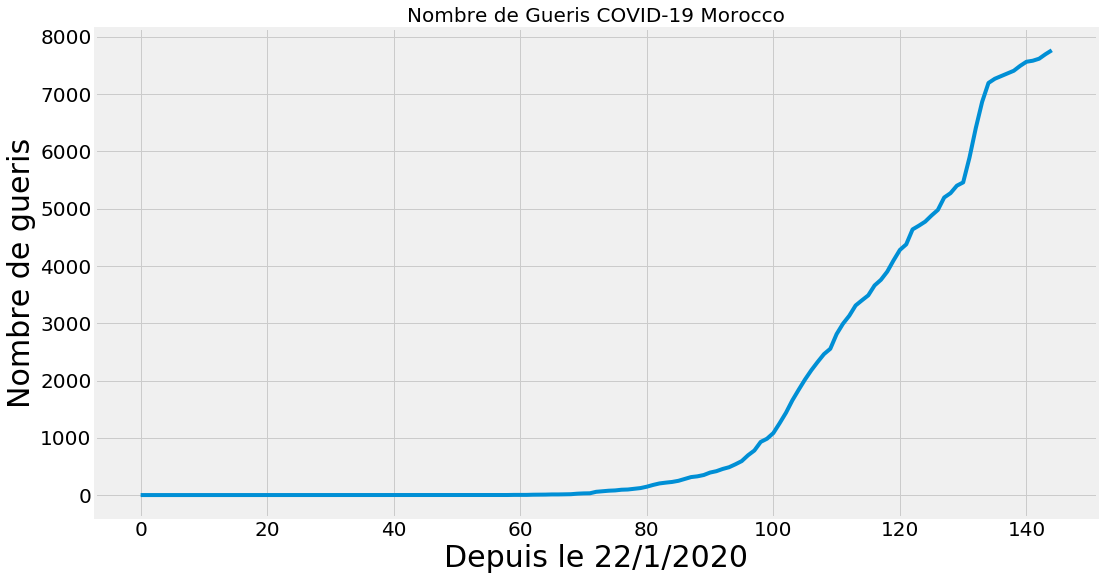

In [31]:
plot_graph(ajuster_date, morocco_recovered, 'Depuis le 22/1/2020','Nombre de gueris','Nombre de Gueris COVID-19 Morocco')

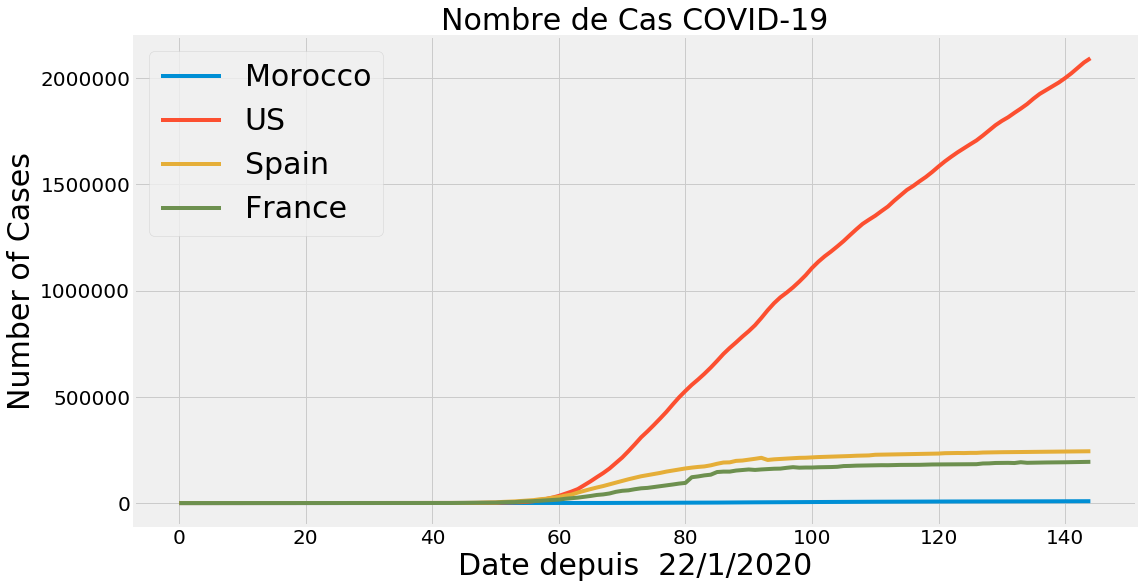

In [33]:
#Visualization du nombre de cas  au Maroc  ainsi que certains cas du reste du monde
plt.figure(figsize=(16,9))
plt.plot(ajuster_date, morocco_cases)
plt.plot(ajuster_date, us_cases)
plt.plot(ajuster_date, spain_cases)
plt.plot(ajuster_date, france_cases)
plt.title('Nombre de Cas COVID-19',size=30)
plt.legend(['Morocco','US', 'Spain', 'France'], prop={'size':30})
plt.xlabel('Date depuis  22/1/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

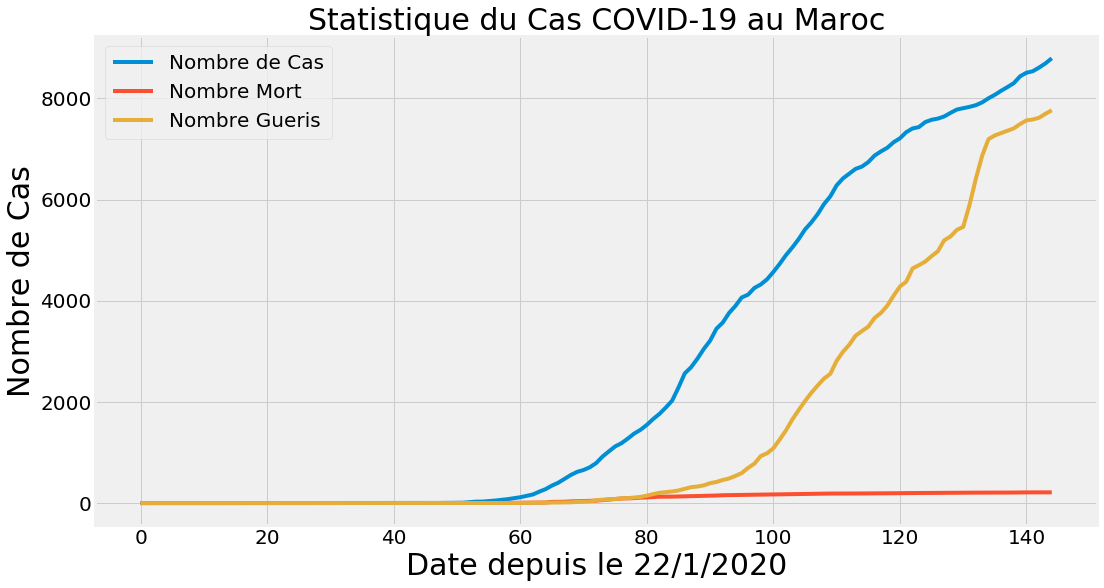

In [34]:
#Visualization du nombre de cas  au Maroc par rapport au cas du reste du monde
plt.figure(figsize=(16,9))
plt.plot(ajuster_date, morocco_cases)
plt.plot(ajuster_date, morocco_deaths)
plt.plot(ajuster_date, morocco_recovered)
plt.legend(['Nombre de Cas','Nombre Mort','Nombre Gueris'], fontsize=20 ,loc='best')
plt.xlabel('Date depuis le 22/1/2020',size=30)
plt.ylabel('Nombre de Cas',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Statistique du Cas COVID-19 au Maroc',size=30)
plt.show()

In [35]:
#Creation de nombre Model

In [36]:
X_train_confirmed,X_test_confirmed, y_train_confirmed,y_test_confirmed = train_test_split(date_depuis_1_22, morocco_cases, test_size=0.25, shuffle=False)

In [37]:
#transformer notre data pour le modele polynomial
poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_prediction = poly.fit_transform(future_prediction)

In [38]:
linear_model = LinearRegression(normalize=True, fit_intercept =True)
linear_model.fit(poly_X_train_confirmed,y_train_confirmed)
#prediction
linear_test_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_prediction)

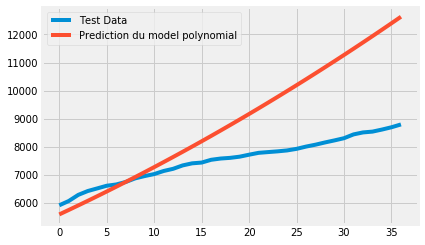

In [39]:
#Visualization du data test en fonction de data test prediction
plt.plot(y_test_confirmed)
plt.plot(linear_test_pred)
plt.legend(['Test Data','Prediction du model polynomial'])

In [62]:
svm_model = SVR(shrinking=True,kernel='poly',gamma=0.01, epsilon=1, degree=3, C=0.01)
svm_model.fit(X_train_confirmed , y_train_confirmed)
svm_test_pred = svm_model.predict(X_test_confirmed)
svm_pred = svm_model.predict(future_prediction)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


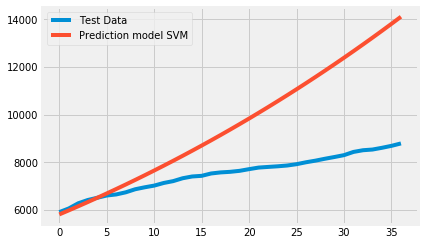

In [63]:
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data ','Prediction model SVM'])

In [64]:
#Prediction dans le future avec le model polynomial
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date':future_prediction_date[-20:],'Nombre de cas dans le future au Maroc avec polynomial model':np.round(linear_pred[-20:])})
poly_df

,Date,Nombre de cas dans le future au Maroc avec polynomial model
0,06/15/2020,12867.0
1,06/16/2020,13104.0
2,06/17/2020,13342.0
3,06/18/2020,13583.0
4,06/19/2020,13826.0
5,06/20/2020,14071.0
6,06/21/2020,14318.0
7,06/22/2020,14567.0
8,06/23/2020,14818.0
9,06/24/2020,15071.0


In [66]:
#Prediction dans le future avec le model svm
svm_pred = svm_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date':future_prediction_date[-20:],'Nombre de cas dans le future au Maroc avec svm':np.round(svm_pred[-20:])})
svm_df

,Date,Nombre de cas dans le future au Maroc avec svm
0,06/15/2020,14413.0
1,06/16/2020,14718.0
2,06/17/2020,15028.0
3,06/18/2020,15342.0
4,06/19/2020,15660.0
5,06/20/2020,15982.0
6,06/21/2020,16309.0
7,06/22/2020,16640.0
8,06/23/2020,16975.0
9,06/24/2020,17315.0
